In [1]:
import sys
sys.path

['',
 '/home/kranthidr/projects/ml_lab/tf-lab',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python35.zip',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5/plat-linux',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5/lib-dynload',
 '/usr/lib64/python3.5',
 '/usr/lib/python3.5',
 '/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages',
 '/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/IPython/extensions',
 '/home/kranthidr/.ipython']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
# from keras.models import Graph

from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2

from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import copy
# from PIL import Image
from datetime import datetime

%matplotlib inline

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
X = np.concatenate((X_train,X_test), axis=0)
print(X.shape)

(70000, 28, 28, 1)


In [31]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
y = np.concatenate((Y_train,Y_test), axis=0)
print(y.shape)

(70000, 10)


In [7]:
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [8]:
model = Sequential()

model.add(Conv2D(6, (5, 5), padding='valid', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Conv2D(16, (5, 5), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Conv2D(120, (1, 1), padding='valid'))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)          0         
__________

In [13]:
t1 = datetime.now()
print('Execution Started at: ' + str(t1))

l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=2,
          verbose=1, validation_data=(X_test, Y_test))

sgd = SGD(lr=0.8 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=3,
          verbose=1, validation_data=(X_test, Y_test))

sgd = SGD(lr=0.4 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=3,
          verbose=1,  validation_data=(X_test, Y_test))

sgd = SGD(lr=0.2 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=4,
          verbose=1,  validation_data=(X_test, Y_test))

sgd = SGD(lr=0.08 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=8,
          verbose=1, validation_data=(X_test, Y_test))

t2 = datetime.now()
print('Execution Ended at: ' + str(t2))
print('Time Taken: ' + str(t2-t1))

Execution Started at: 2018-08-11 09:21:41.883676
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 20s 338us/step - loss: 2.3385 - acc: 0.1021 - val_loss: 2.3187 - val_acc: 0.1010
Epoch 2/2
60000/60000 [==============================] - 20s 331us/step - loss: 2.3378 - acc: 0.1018 - val_loss: 2.3360 - val_acc: 0.0980
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 20s 332us/step - loss: 2.3306 - acc: 0.1019 - val_loss: 2.3281 - val_acc: 0.1135
Epoch 2/3
60000/60000 [==============================] - 19s 323us/step - loss: 2.3297 - acc: 0.1027 - val_loss: 2.3212 - val_acc: 0.1135
Epoch 3/3
60000/60000 [==============================] - 20s 330us/step - loss: 2.3296 - acc: 0.1034 - val_loss: 2.3371 - val_acc: 0.0892
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 21s 356us/step - loss: 2.3158 - acc: 0.1032 - val_loss

In [32]:
t1 = datetime.now()
print('Execution Started at: ' + str(t1))

l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=2,
          verbose=1,shuffle=True, validation_split=0.1)

sgd = SGD(lr=0.8 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3,
          verbose=1, shuffle=True, validation_split=0.1)

sgd = SGD(lr=0.4 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3,
          verbose=1,  shuffle=True, validation_split=0.1)

sgd = SGD(lr=0.2 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=4,
          verbose=1,  shuffle=True, validation_split=0.1)

sgd = SGD(lr=0.08 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit( X, y, batch_size=32, epochs=8,
          verbose=1, shuffle=True, validation_split=0.1)

t2 = datetime.now()
print('Execution Ended at: ' + str(t2))
print('Time Taken: ' + str(t2-t1))

Execution Started at: 2018-08-11 09:46:02.408778
Train on 63000 samples, validate on 7000 samples
Epoch 1/2
63000/63000 [==============================] - 23s 370us/step - loss: 2.3361 - acc: 0.1029 - val_loss: 2.3191 - val_acc: 0.0983
Epoch 2/2
63000/63000 [==============================] - 21s 334us/step - loss: 2.3376 - acc: 0.1024 - val_loss: 2.3503 - val_acc: 0.1031
Train on 63000 samples, validate on 7000 samples
Epoch 1/3
63000/63000 [==============================] - 21s 329us/step - loss: 2.3293 - acc: 0.1062 - val_loss: 2.3562 - val_acc: 0.1027
Epoch 2/3
63000/63000 [==============================] - 20s 324us/step - loss: 2.3287 - acc: 0.1027 - val_loss: 2.3123 - val_acc: 0.0980
Epoch 3/3
63000/63000 [==============================] - 21s 334us/step - loss: 2.3308 - acc: 0.1013 - val_loss: 2.3369 - val_acc: 0.1027
Train on 63000 samples, validate on 7000 samples
Epoch 1/3
63000/63000 [==============================] - 20s 324us/step - loss: 2.3160 - acc: 0.1015 - val_loss: 2

In [33]:
model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 144us/step


[2.3021023498535156, 0.1135]

In [34]:
print("Test classification rate %0.05f" %model.evaluate(X_test, Y_test, verbose=1)[1])

10000/10000 [==============================] - 1s 138us/step
Test classification rate 0.11350


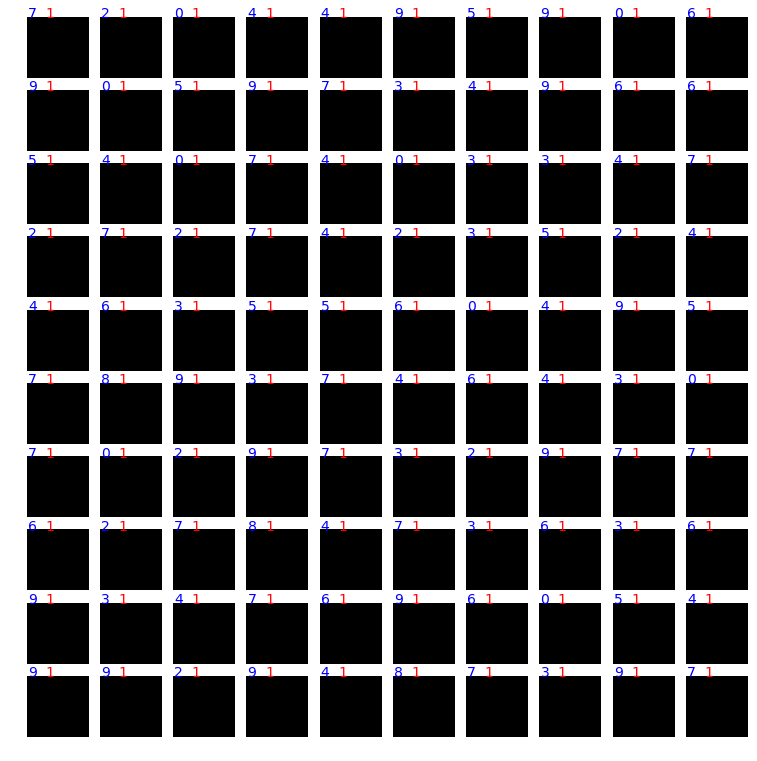

In [35]:
y_hat = model.predict_classes(X_test)
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')